In [1]:
import numpy as np
import h5py

import matplotlib.pyplot as plt
%matplotlib inline

from math import *

In [2]:
arrays = {}
f = h5py.File('mnist.mat')
for k, v in f.items():
    arrays[k] = np.array(v)

In [3]:
arrays.keys()

dict_keys(['digits_test', 'digits_train', 'labels_test', 'labels_train'])

In [4]:
#Use the entire training set of 60000 examples
len(arrays['digits_train'])

60000

In [5]:
#Each image is stored as a matrix (28×28) of numbers
arrays['digits_train'][0].shape

(28, 28)

In [6]:
#You can visualize these images (or matrices) using the functions imagesc() or imshow().
from keras.datasets import mnist
(digits_train, labels_train), (digits_test, labels_test) = mnist.load_data()

Label: 8


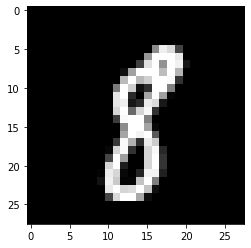

In [7]:
print('Label:',labels_train[300])
plt.gray()
plt.imshow(digits_train[300])

For the following computations, make sure to convert (cast) the integer data type to a floating-point type. For this question, you cannot use the functions mean(), cov(), and pca() in Matlab.<br>
Note: Before computing the mean and covariance matrix, convert each 28×28 pixel image matrix toa 28^2 × 1 vector by concatenating its columns. To visualize the 28^2 × 1 mean vector, convert it back to a matrix and then visualize it using imagesc(). Use the reshape() function to change matrices to vectors and vice versa. The covariance matrix will be of size 28^2 × 28^2.

In [8]:
#Convert each 28×28 pixel image matrix toa 28^2 × 1 vector by concatenating its columns.
reshaped_digits_train = []
for i in range(len(digits_train)):
    reshaped_digits_train.append(digits_train[i].reshape((28*28,1)))

a) For every digit, from 0 to 9, compute:<br>
(i) the mean µ (3 points),<br>
(ii) the covariance matrix C (5 points), and<br>
(ii) the principal mode of variation determined by the eigenvector v1 and the corresponding eigenvalue λ1 (where λ1 is the largest of all eigenvalues) of the covariance matrix C (7 points).

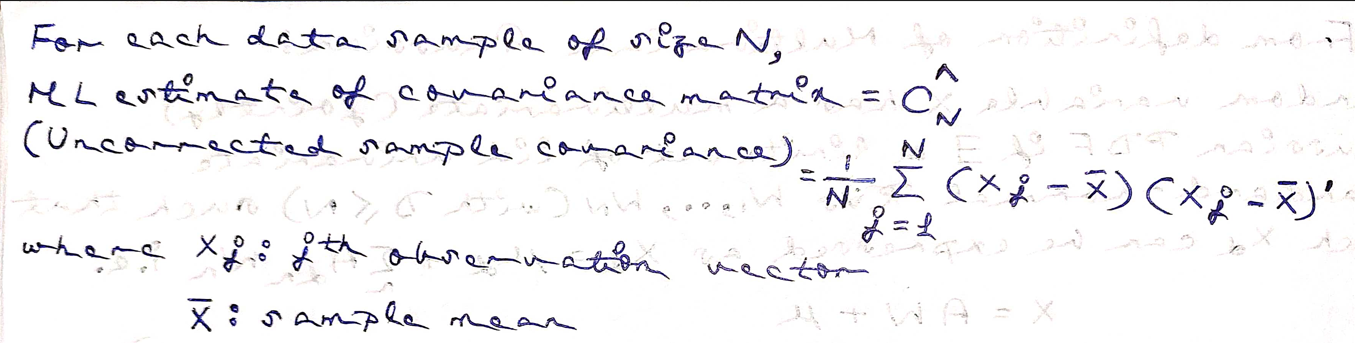

In [9]:
#Training data specific to one digit
def digit_dataset(digit,train_data):
    sample =  []
    for i in range(len(labels_train)):
        if labels_train[i]==digit:
            sample.append(train_data[i])        
    return sample

def compute_data_matrix(dataset):
  D = []
  n = len(dataset)
  for p in range(784):
    d = []
    for i in range(n):
      d.append(dataset[i][p][0])
    D.append(d)
  return D

def centering(dataset,mu):
  D = []
  for i in range(784):
    D.append([d-mu[i][0] for d in dataset[i]])
  return np.array(D)

def compute_mean(dataset):
    mean = []
    n = len(dataset)
    for p in range(784):
        s=0
        for i in range(n):
            s += dataset[i][p][0]
        m = s/n
        mean.append([m])
        mu = np.array(mean)
    return mu

def compute_covariance(D_centered,n):
    CC = (np.matmul(D_centered,np.transpose(D_centered)))/(n-1)
    return CC

<h2>For digit 0:</h2>

**Mean**

In [10]:
dataset0 = digit_dataset(0,reshaped_digits_train)
mu0 = compute_mean(dataset0)
m0 = mu0.reshape(28,28)
np.save('Mean_Digit0', m0)
print(m0)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.16106703e-02
  4.27148405e-02 1.75586696e-02 0.00000000e+00 1.51950025e-02
  4.15330069e-02 1.97535033e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.89616748e-03
  1.68833361e-03 0.00000000e+00 1.43508357e-02 3.37666723e-02
  7.42

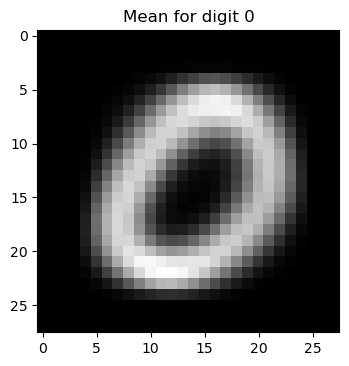

In [11]:
plt.figure(dpi=100)
plt.title('Mean for digit 0')
plt.imshow(m0)

**Covariance**

In [12]:
D0 = compute_data_matrix(dataset0)
DC0 = centering(D0,mu0)
n0 = len(dataset0)
CC0 = compute_covariance(DC0,n0)

In [13]:
print(CC0)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
np.save('Covariance_Digit0', CC0)

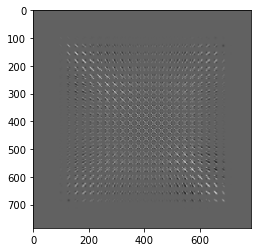

In [15]:
plt.imshow(CC0)

<h2>For digit 1:</h2>

**Mean**

In [16]:
dataset1 = digit_dataset(1,reshaped_digits_train)
mu1 = compute_mean(dataset1)
m1 = mu1.reshape(28,28)
np.save('Mean_Digit1', m1)
print(m1)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.62770691e-02 7.53485613e-02
  1.05309997e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

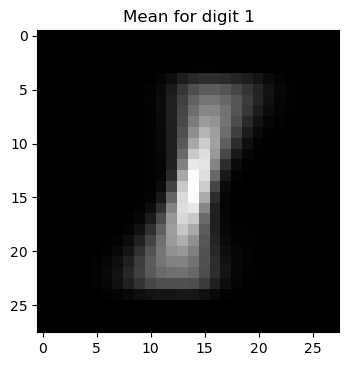

In [17]:
plt.figure(dpi=100)
plt.title('Mean for digit 1')
plt.imshow(m1)

**Covariance**

In [18]:
D1 = compute_data_matrix(dataset1)
DC1 = centering(D1,mu1)
n1 = len(dataset1)
CC1 = compute_covariance(DC1,n1)

In [19]:
print(CC1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
np.save('Covariance_Digit1', CC1)

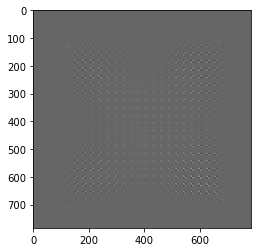

In [21]:
plt.imshow(CC1)

<h2>For digit 2:</h2>

**Mean**

In [22]:
dataset2 = digit_dataset(2,reshaped_digits_train)
mu2 = compute_mean(dataset2)
m2 = mu2.reshape(28,28)
np.save('Mean_Digit2', m2)
print(m2)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.67841558e-03 3.62537764e-02 3.62537764e-02 1.51057402e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.68546492e-03
  4.68277946e-02 5.97515945e-02 1.02047667e-01 1.20006714e-01
  6.61295737e-02 9.41591138e-02 1.83115139e-01 1.86807654e-01
  3.36522323e-01 1.42833165e-01 1.20845921e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.55287009e-03 7.67035918e-02 2.57468949e-01
  6.08

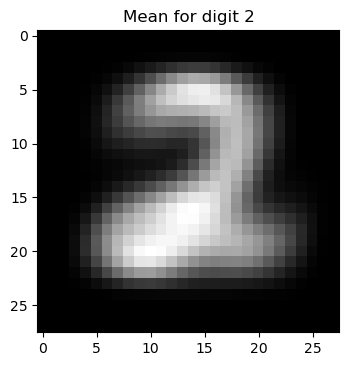

In [23]:
plt.figure(dpi=100)
plt.title('Mean for digit 2')
plt.imshow(m2)

**Covariance**

In [24]:
D2 = compute_data_matrix(dataset2)
DC2 = centering(D2,mu2)
n2 = len(dataset2)
CC2 = compute_covariance(DC2,n2)

In [25]:
print(CC2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
np.save('Covariance_Digit2', CC2)

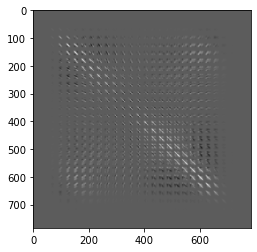

In [27]:
plt.imshow(CC2)

<h2>For digit 3:</h2>

**Mean**

In [28]:
dataset3 = digit_dataset(3,reshaped_digits_train)
mu3 = compute_mean(dataset3)
m3 = mu3.reshape(28,28)
np.save('Mean_Digit3', m3)
print(m3)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

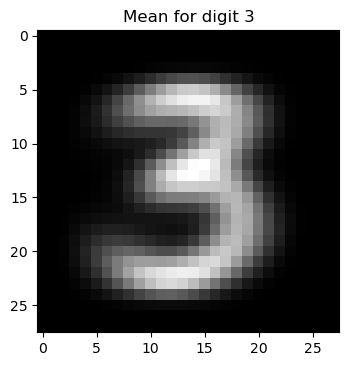

In [29]:
plt.figure(dpi=100)
plt.title('Mean for digit 3')
plt.imshow(m3)

**Covariance**

In [30]:
D3 = compute_data_matrix(dataset3)
DC3 = centering(D3,mu3)
n3 = len(dataset3)
CC3 = compute_covariance(DC3,n3)

In [31]:
print(CC3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
np.save('Covariance_Digit3', CC3)

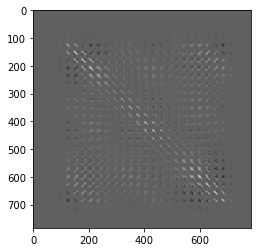

In [33]:
plt.imshow(CC3)

<h2>For digit 4:</h2>

**Mean**

In [34]:
dataset4 = digit_dataset(4,reshaped_digits_train)
mu4 = compute_mean(dataset4)
m4 = mu4.reshape(28,28)
np.save('Mean_Digit4', m4)
print(m4)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.30640192e-03 3.30366313e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

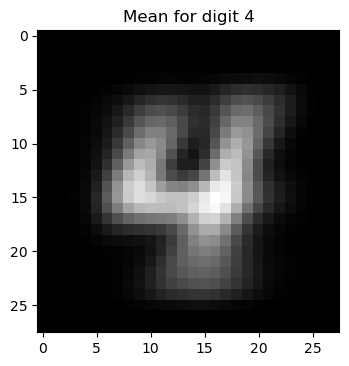

In [35]:
plt.figure(dpi=100)
plt.title('Mean for digit 4')
plt.imshow(m4)

**Covariance**

In [36]:
D4 = compute_data_matrix(dataset4)
DC4 = centering(D4,mu4)
n4 = len(dataset4)
CC4 = compute_covariance(DC4,n4)

In [37]:
print(CC4)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
np.save('Covariance_Digit4', CC4)

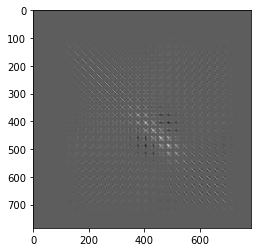

In [39]:
plt.imshow(CC4)

<h2>For digit 5:</h2>

**Mean**

In [40]:
dataset5 = digit_dataset(5,reshaped_digits_train)
mu5 = compute_mean(dataset5)
m5 = mu5.reshape(28,28)
np.save('Mean_Digit5', m5)
print(m5)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

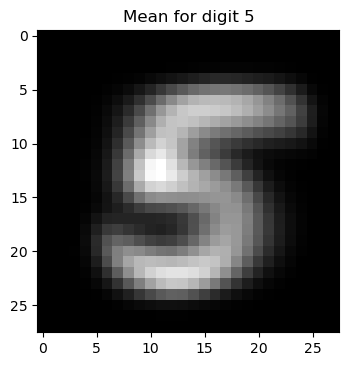

In [41]:
plt.figure(dpi=100)
plt.title('Mean for digit 5')
plt.imshow(m5)

**Covariance**

In [42]:
D5 = compute_data_matrix(dataset5)
DC5 = centering(D5,mu5)
n5 = len(dataset5)
CC5 = compute_covariance(DC5,n5)

In [43]:
print(CC5)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
np.save('Covariance_Digit5', CC5)

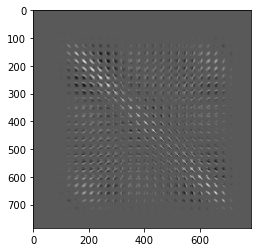

In [45]:
plt.imshow(CC5)

<h2>For digit 6:</h2>

**Mean**

In [46]:
dataset6 = digit_dataset(6,reshaped_digits_train)
mu6 = compute_mean(dataset6)
m6 = mu6.reshape(28,28)
np.save('Mean_Digit6', m6)
print(m6)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.96012166e-02 4.29199054e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.70361609e-03 9.29368030e-03 9.41196350e-02 2.43494424e-01
  3.96079757e-01 5.89726259e-01 1.11524164e+00 1.48715782e+00
  1.65664076e+00 1.68131125e+00 1.64971274e+00 1.47651234e+00
  1.50287259e+00 1.39422102e+00 1.00287259e+00 7.22203447e-01
  5.45623521e-01 2.16627239e-01 1.02230483e-01 3.58229131e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.08144643e-02 2.19668807e-03
  6.87732342e-02 4.79891855e-02 3.85941196e-01 1.11017236e+00
  2.05

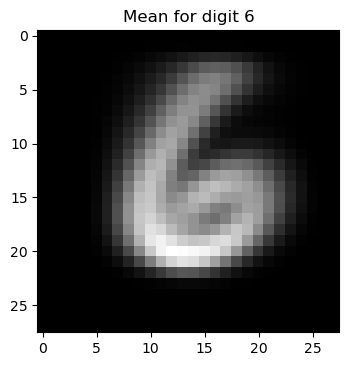

In [47]:
plt.figure(dpi=100)
plt.title('Mean for digit 6')
plt.imshow(m6)

**Covariance**

In [48]:
D6 = compute_data_matrix(dataset6)
DC6 = centering(D6,mu6)
n6 = len(dataset6)
CC6 = compute_covariance(DC6,n6)

In [49]:
print(CC6)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
np.save('Covariance_Digit6', CC6)

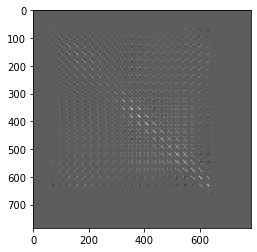

In [51]:
plt.imshow(CC6)

<h2>For digit 7:</h2>

**Mean**

In [52]:
dataset7 = digit_dataset(7,reshaped_digits_train)
mu7 = compute_mean(dataset7)
m7 = mu7.reshape(28,28)
np.save('Mean_Digit7', m7)
print(m7)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

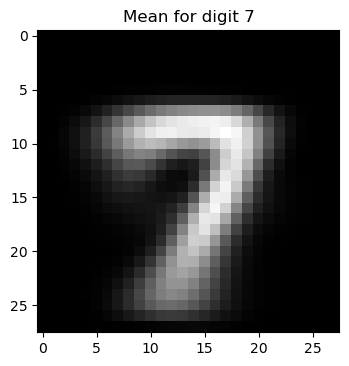

In [53]:
plt.figure(dpi=100)
plt.title('Mean for digit 7')
plt.imshow(m7)

**Covariance**

In [54]:
D7 = compute_data_matrix(dataset7)
DC7 = centering(D7,mu7)
n7 = len(dataset7)
CC7 = compute_covariance(DC7,n7)

In [55]:
print(CC7)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [56]:
np.save('Covariance_Digit7', CC7)

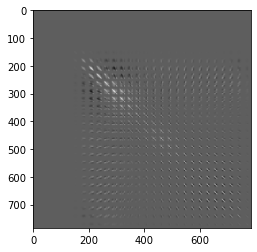

In [57]:
plt.imshow(CC7)

<h2>For digit 8:</h2>

**Mean**

In [58]:
dataset8 = digit_dataset(8,reshaped_digits_train)
mu8 = compute_mean(dataset8)
m8 = mu8.reshape(28,28)
np.save('Mean_Digit8', m8)
print(m8)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

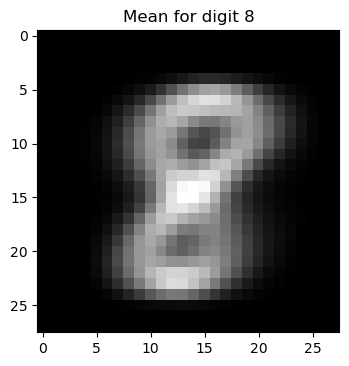

In [59]:
plt.figure(dpi=100)
plt.title('Mean for digit 8')
plt.imshow(m8)

**Covariance**

In [60]:
D8 = compute_data_matrix(dataset8)
DC8 = centering(D8,mu8)
n8 = len(dataset8)
CC8 = compute_covariance(DC8,n8)

In [61]:
print(CC8)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
np.save('Covariance_Digit8', CC8)

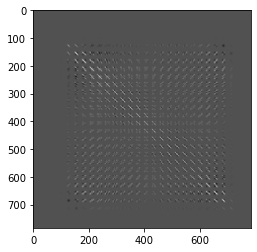

In [63]:
plt.imshow(CC8)

<h2>For digit 9:</h2>

**Mean**

In [64]:
dataset9 = digit_dataset(9,reshaped_digits_train)
mu9 = compute_mean(dataset9)
m9 = mu9.reshape(28,28)
np.save('Mean_Digit9', m9)
print(m9)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

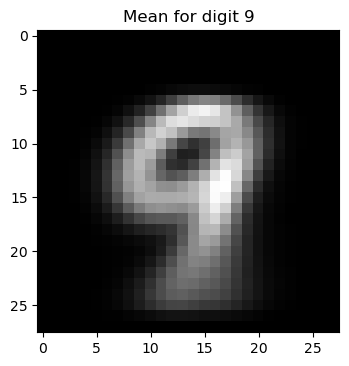

In [65]:
plt.figure(dpi=100)
plt.title('Mean for digit 9')
plt.imshow(m9)

**Covariance**

In [66]:
D9 = compute_data_matrix(dataset9)
DC9 = centering(D9,mu9)
n9 = len(dataset9)
CC9 = compute_covariance(DC9,n9)

In [67]:
print(CC9)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [68]:
np.save('Covariance_Digi9', CC9)

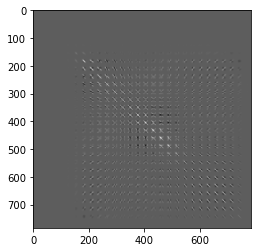

In [69]:
plt.imshow(CC9)

**The principal mode of variation determined by the eigenvector v1 and the corresponding eigenvalue λ1 (where λ1 is the largest of all eigenvalues) of the covariance matrix C.(7 points)**

In [70]:
#For digit 0
eig_val_0, eig_vec_0 = np.linalg.eigh(CC0)

lambda01 = eig_val_0[783] #the largest of all eigenvalues
v01 = eig_vec_0[:,783] #corresponding eigenvector

print('For digit 0, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v01)
print('Eigenvalue λ1=',lambda01)

np.save('Principal_mode_of_variation_0', v01)

For digit 0, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.13353691e-05
  8.17019404e-05  3.35849874e-05  5.55111512e-17  3.46547443e-05
  9.47229677e-05  4.50511676e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -9.86076

In [71]:
#For digit 1
eig_val_1, eig_vec_1 = np.linalg.eigh(CC1)

lambda11 = eig_val_1[783] #the largest of all eigenvalues
v11 = eig_vec_1[:,783] #corresponding eigenvector

print('For digit 1, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v11)
print('Eigenvalue λ1=',lambda11)

np.save('Principal_mode_of_variation_1', v11)

For digit 1, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.29312546e-05  4.47168665e-05
  6.51406152e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.46519

In [72]:
#For digit 2
eig_val_2, eig_vec_2 = np.linalg.eigh(CC2)

lambda21 = eig_val_2[783] #the largest of all eigenvalues
v21 = eig_vec_2[:,783] #corresponding eigenvector

print('For digit 2, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v21)
print('Eigenvalue λ1=',lambda21)

np.save('Principal_mode_of_variation_2', v21)

For digit 2, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.82839552e-06 -3.94933432e-05 -3.94933432e-05 -1.64555597e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.33680869e-19
  5.42101086e-20  0.00000000e+00  1.69406589e-21  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.13590306e-25 -5.16987883e-26
 -3.23117427e-27 -2.01948392e-28  0.00000000e+00 -7.88860905e-31
 -4.93038066e-32  0.00000000e+00  0.00000000e+00  5.90452426e-07
  1.88880936e-05  3.64222955e-05  6.64639116e-05  7.94740405e-05
  5.68183606e-05 -1.78651734e-05 -8.71054636e-05 -7.06602071e-05
 -4.51316390e-05 -3.34490897e-05 -5.05620990e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [73]:
#For digit 3
eig_val_3, eig_vec_3 = np.linalg.eigh(CC3)

lambda31 = eig_val_3[783] #the largest of all eigenvalues
v31 = eig_vec_3[:,783] #corresponding eigenvector

print('For digit 3, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v31)
print('Eigenvalue λ1=',lambda31)

np.save('Principal_mode_of_variation_3', v31)

For digit 3, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [74]:
#For digit 4
eig_val_4, eig_vec_4 = np.linalg.eigh(CC4)

lambda41 = eig_val_4[783] #the largest of all eigenvalues
v41 = eig_vec_4[:,783] #corresponding eigenvector

print('For digit 4, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v41)
print('Eigenvalue λ1=',lambda41)

np.save('Principal_mode_of_variation_4', v41)

For digit 4, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.45735916e-06 -9.07323607e-06 -2.77555756e-17
  1.11022302e-16  0.00000000e+00  1.11022302e-16  5.55111512e-17
  2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [75]:
#For digit 5
eig_val_5, eig_vec_5 = np.linalg.eigh(CC5)

lambda51 = eig_val_5[783] #the largest of all eigenvalues
v51 = eig_vec_5[:,783] #corresponding eigenvector

print('For digit 5, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v51)
print('Eigenvalue λ1=',lambda51)

np.save('Principal_mode_of_variation_5', v51)

For digit 5, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [76]:
#For digit 6
eig_val_6, eig_vec_6 = np.linalg.eigh(CC6)

lambda61 = eig_val_6[783] #the largest of all eigenvalues
v61 = eig_vec_6[:,783] #corresponding eigenvector

print('For digit 6, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v61)
print('Eigenvalue λ1=',lambda61)

np.save('Principal_mode_of_variation_6', v61)

For digit 6, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.45467287e-05 -3.18523197e-05  1.11022302e-16 -1.11022302e-16
  2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.26217745e-29  0.00000000e+00  0.00000000e+00 -6.16297582e-33
 -5.14335917e-06 -1.71797928e-05 -1.26520750e-04 -3.63381191e-04
 -7.14715448e-04 -1.13042728e-03 -1.94943962e-03 -2.63137997e-03
 -2.76835229e-03 -2.50217941e-03 -2.40396486e-03 -1.88333958e-03
 -1.19002068e-03 -4.30102619e-04  2.08571525e-04  6.46628859e-04
  5.12070970e-04  1.24002696e-04 -1.72047336e-06 -4.43017676e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [77]:
#For digit 7
eig_val_7, eig_vec_7 = np.linalg.eigh(CC7)

lambda71 = eig_val_7[783] #the largest of all eigenvalues
v71 = eig_vec_7[:,783] #corresponding eigenvector

print('For digit 7, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v71)
print('Eigenvalue λ1=',lambda71)

np.save('Principal_mode_of_variation_7', v71)

For digit 7, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [78]:
#For digit 8
eig_val_8, eig_vec_8 = np.linalg.eigh(CC8)

lambda81 = eig_val_8[783] #the largest of all eigenvalues
v81 = eig_vec_8[:,783] #corresponding eigenvector

print('For digit 8, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v81)
print('Eigenvalue λ1=',lambda81)

np.save('Principal_mode_of_variation_8', v81)

For digit 8, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [79]:
#For digit 9
eig_val_9, eig_vec_9 = np.linalg.eigh(CC9)

lambda91 = eig_val_9[783] #the largest of all eigenvalues
v91 = eig_vec_9[:,783] #corresponding eigenvector

print('For digit 9, the principal mode of variation is determined by:\n')
print('Eigenvector v1 =',v91)
print('Eigenvalue λ1=',lambda91)

np.save('Principal_mode_of_variation_9', v91)

For digit 9, the principal mode of variation is determined by:

Eigenvector v1 = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

• (5 points) For each digit, sort the 28^2 eigenvalues of the covariance matrix and plot them as a graph. Comment and justify what you observe. How many “principal” / significant modes of variation (i.e., number of “large” eigenvalues) do you find, for each digit ? Are the significant modes of variation equal to 28^2 or far less ? Why ?

In [80]:
def compute_explained_variance(eig_vals):
    c_sum = np.cumsum(eig_vals) #Cumulative sum of the eigenvalues
    explained_variance = c_sum/np.sum(eig_vals) #Normalization
    return explained_variance

**For digit 0:**

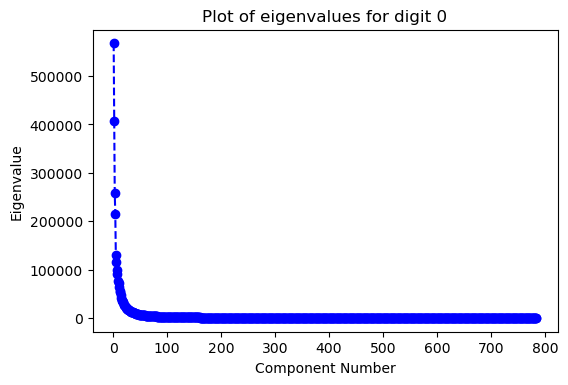

In [81]:
plt.figure(dpi=100)
eig_val_0_desc = eig_val_0[::-1]
plt.plot(range(1,785,1),eig_val_0_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 0')
plt.show()

Text(0, 0.5, 'Number of components')

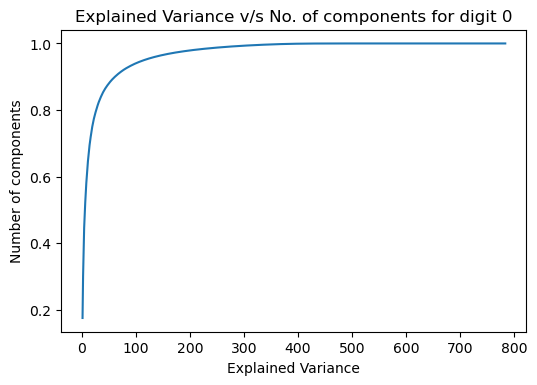

In [82]:
explained_var_0 = compute_explained_variance(eig_val_0_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_0)
plt.title('Explained Variance v/s No. of components for digit 0')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**For digit 1:**

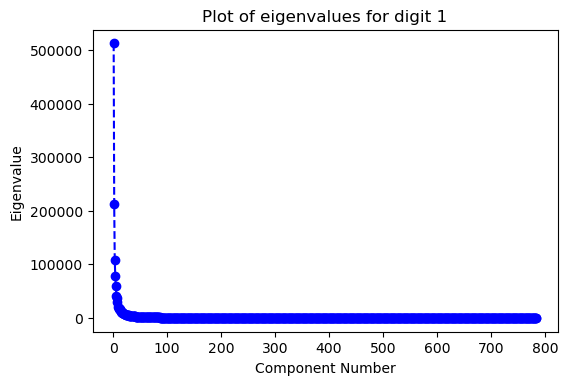

In [83]:
plt.figure(dpi=100)
eig_val_1_desc = eig_val_1[::-1]
plt.plot(range(1,785,1),eig_val_1_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 1')
plt.show()

Text(0, 0.5, 'Number of components')

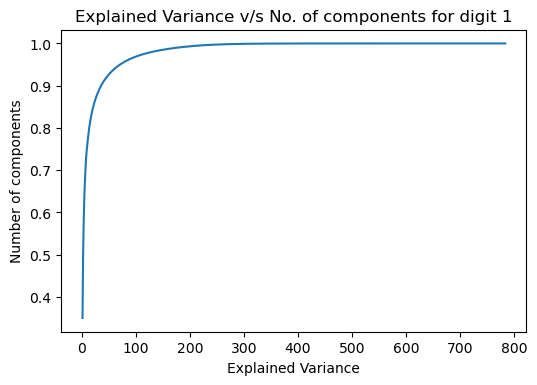

In [84]:
explained_var_1 = compute_explained_variance(eig_val_1_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_1)
plt.title('Explained Variance v/s No. of components for digit 1')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**For digit 2:**

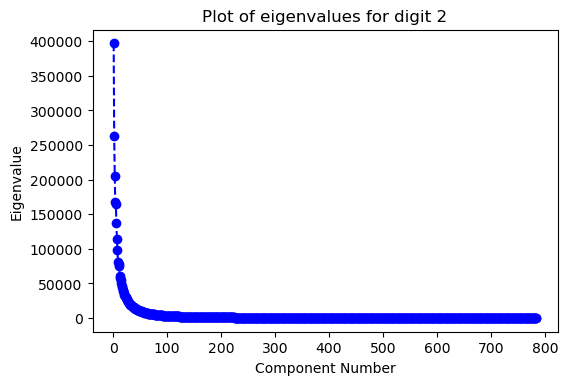

In [85]:
plt.figure(dpi=100)
eig_val_2_desc = eig_val_2[::-1]
plt.plot(range(1,785,1),eig_val_2_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 2')
plt.show()

Text(0, 0.5, 'Number of components')

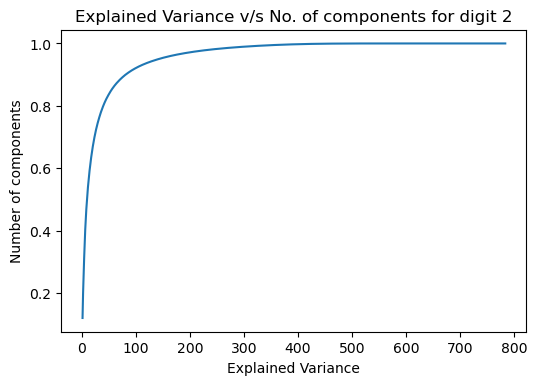

In [86]:
explained_var_2 = compute_explained_variance(eig_val_2_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_2)
plt.title('Explained Variance v/s No. of components for digit 2')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**For digit 3:**

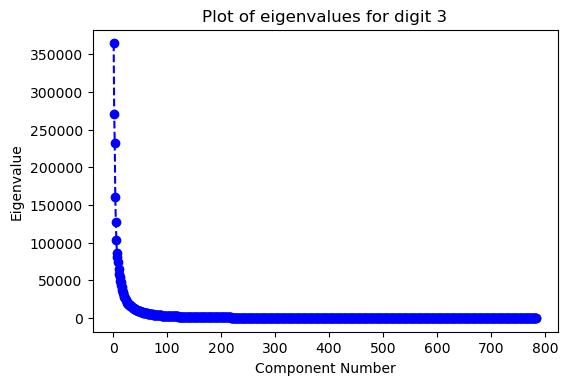

In [87]:
plt.figure(dpi=100)
eig_val_3_desc = eig_val_3[::-1]
plt.plot(range(1,785,1),eig_val_3_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 3')
plt.show()

Text(0, 0.5, 'Number of components')

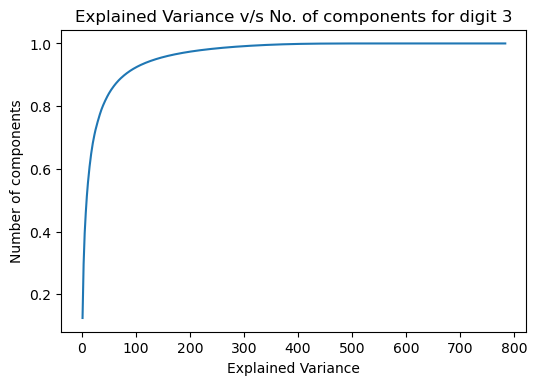

In [88]:
explained_var_3 = compute_explained_variance(eig_val_3_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_3)
plt.title('Explained Variance v/s No. of components for digit 3')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**For digit 4:**

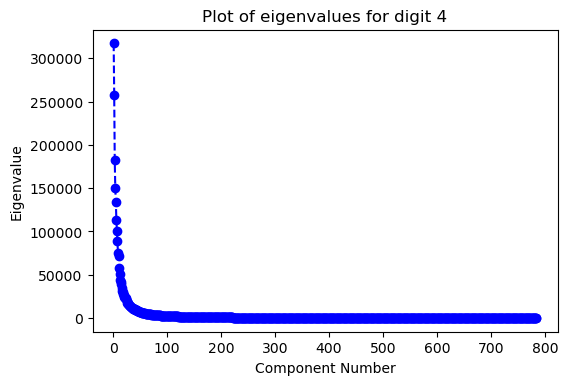

In [89]:
plt.figure(dpi=100)
eig_val_4_desc = eig_val_4[::-1]
plt.plot(range(1,785,1),eig_val_4_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 4')
plt.show()

Text(0, 0.5, 'Number of components')

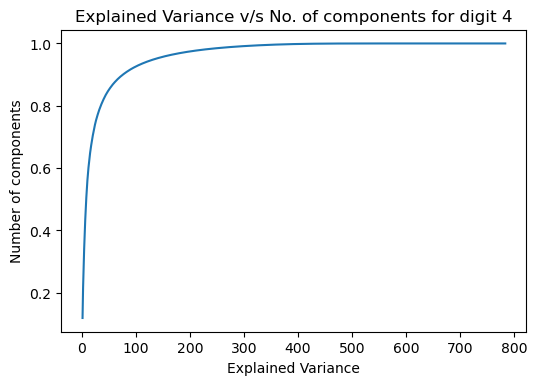

In [90]:
explained_var_4 = compute_explained_variance(eig_val_4_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_4)
plt.title('Explained Variance v/s No. of components for digit 4')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**For digit 5:**

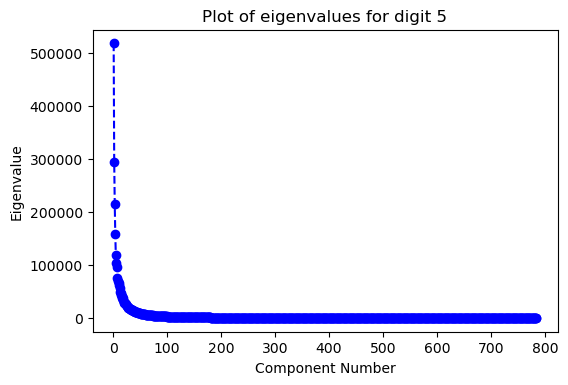

In [91]:
plt.figure(dpi=100)
eig_val_5_desc = eig_val_5[::-1]
plt.plot(range(1,785,1),eig_val_5_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 5')
plt.show()

Text(0, 0.5, 'Number of components')

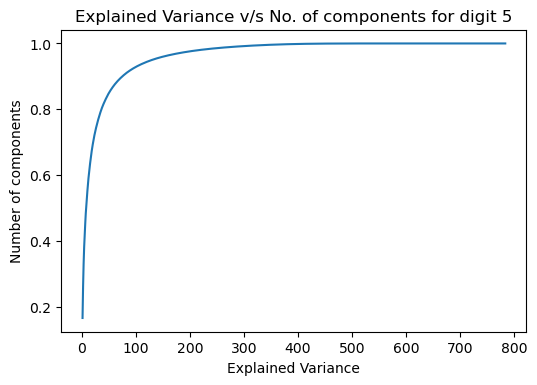

In [92]:
explained_var_5 = compute_explained_variance(eig_val_5_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_5)
plt.title('Explained Variance v/s No. of components for digit 5')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**For digit 6:**

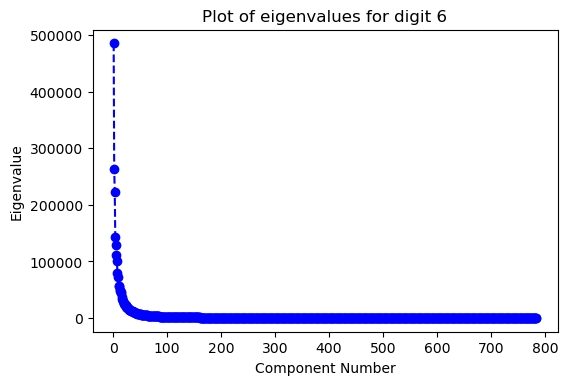

In [93]:
plt.figure(dpi=100)
eig_val_6_desc = eig_val_6[::-1]
plt.plot(range(1,785,1),eig_val_6_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 6')
plt.show()

Text(0, 0.5, 'Number of components')

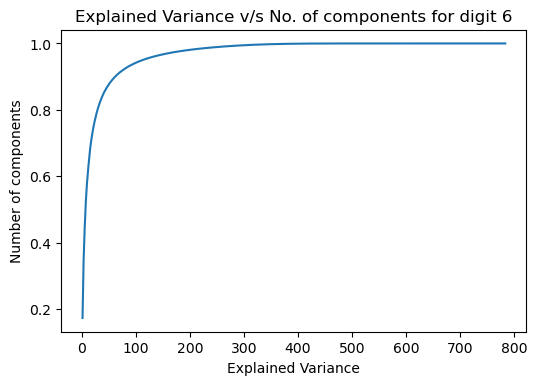

In [94]:
explained_var_6 = compute_explained_variance(eig_val_6_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_6)
plt.title('Explained Variance v/s No. of components for digit 6')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**For digit 7:**

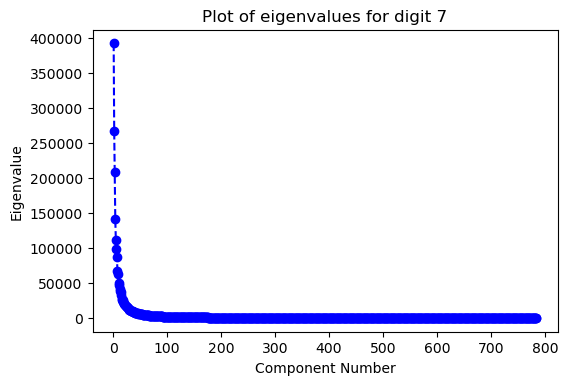

In [95]:
plt.figure(dpi=100)
eig_val_7_desc = eig_val_7[::-1]
plt.plot(range(1,785,1),eig_val_7_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 7')
plt.show()

Text(0, 0.5, 'Number of components')

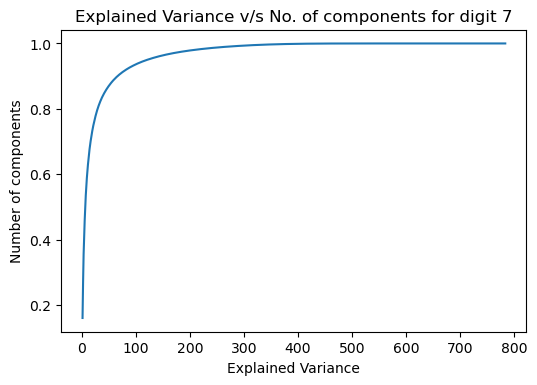

In [96]:
explained_var_7 = compute_explained_variance(eig_val_7_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_7)
plt.title('Explained Variance v/s No. of components for digit 7')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**For digit 8:**

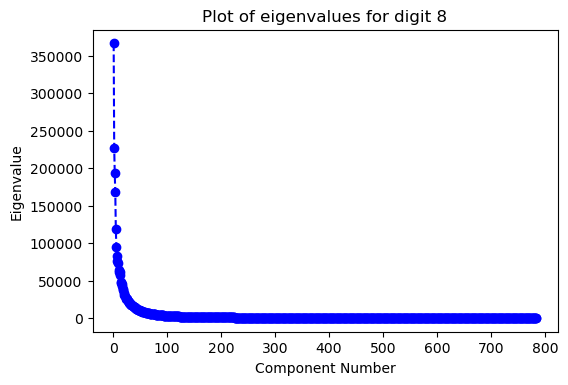

In [97]:
plt.figure(dpi=100)
eig_val_8_desc = eig_val_8[::-1]
plt.plot(range(1,785,1),eig_val_8_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 8')
plt.show()

Text(0, 0.5, 'Number of components')

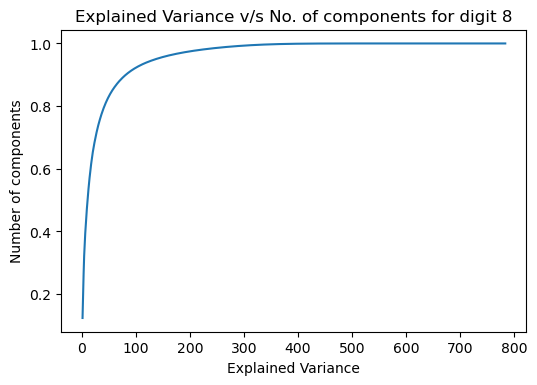

In [98]:
explained_var_8 = compute_explained_variance(eig_val_8_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_8)
plt.title('Explained Variance v/s No. of components for digit 8')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**For digit 9:**

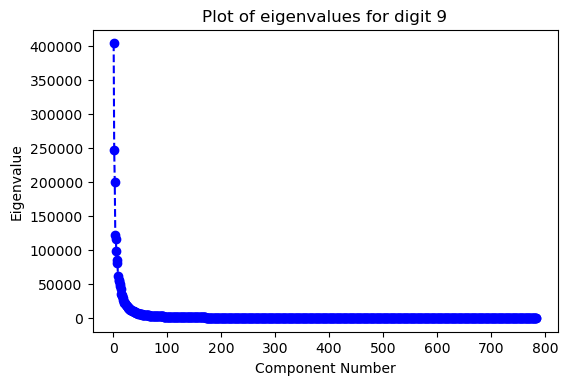

In [99]:
plt.figure(dpi=100)
eig_val_9_desc = eig_val_9[::-1]
plt.plot(range(1,785,1),eig_val_9_desc,color='blue', marker='o',linestyle='dashed')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Plot of eigenvalues for digit 9')
plt.show()

Text(0, 0.5, 'Number of components')

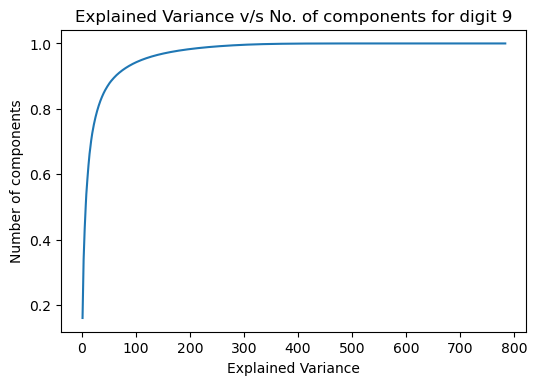

In [100]:
explained_var_9 = compute_explained_variance(eig_val_9_desc)
plt.figure(dpi=100)
plt.plot(range(1,785),explained_var_9)
plt.title('Explained Variance v/s No. of components for digit 9')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

**Comment on plot of eigenvalues of the covariance matrix:** We observe that the first few eigenvalues drop very fast. After that,the eigenvalues start tapering off which suggests that the variation may not occur naturally in the original uncorrupted data. Also the explained variance is very small along these components and are present because of noise in the data.

**For each digit, there are around 100 principal/significant modes of variation.** These top 100 principal components are able to explain about 90% of the variance present in the data.

**The significant modes of variation are far less than 28<sup>2</sup>.** This is because only a few components play a significant role in explaining the variation in the data. The rest are simply due to the presence of noise in data.We will be able to reconstruct much of the structure present in the data with only the top 100 components instead of using all 784 components.

• (5 points) For each digit, show the 3 images side by side: (i) µ − √λ1v1, (ii) µ, and (iii) µ + √λ1v1, to show the principal mode of variation of the digits around their mean. Comment and justify what you observe. For a certain digit, say 1, what does the principal mode of variation tell you about how people write that digit ?

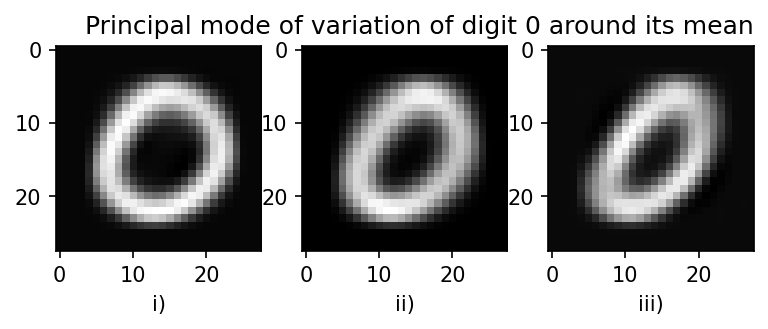

In [101]:
#For digit 0
v01 = v01.reshape(784,1)
pm0_1 = mu0 - sqrt(lambda01)*v01
pm0_2 = mu0
pm0_3 = mu0 + sqrt(lambda01)*v01

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm0_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm0_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm0_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 0 around its mean',loc='right')
plt.show()

For digit 0, the principal mode of variation tell us that people usually write the digit as a circle as in i) or as an inclined oval as in iii).

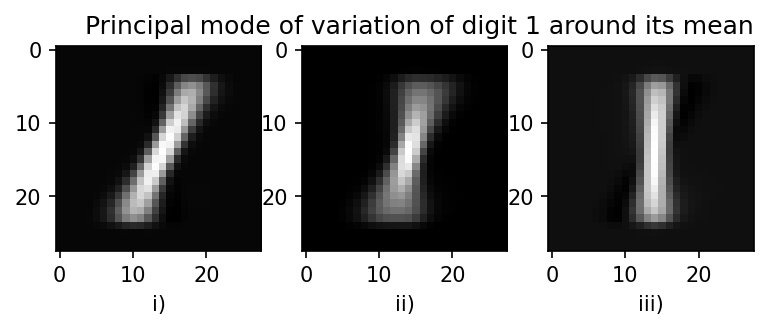

In [102]:
#For digit 1
v11 = v11.reshape(784,1)
pm1_1 = mu1 - sqrt(lambda11)*v11
pm1_2 = mu1
pm1_3 = mu1 + sqrt(lambda11)*v11

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm1_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm1_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm1_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 1 around its mean',loc='right')
plt.show()

For digit 1, the principal mode of variation tell us that people usually write the digit as a straight line as in iii) or as an inclined line as in i).

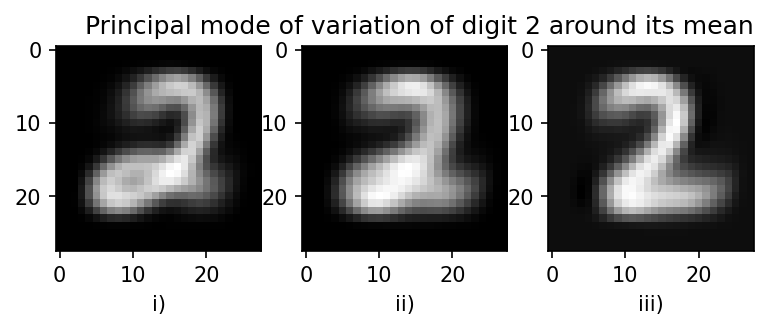

In [103]:
#For digit 2
v21 = v21.reshape(784,1)
pm2_1 = mu2 - sqrt(lambda21)*v21
pm2_2 = mu2
pm2_3 = mu2 + sqrt(lambda21)*v21

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm2_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm2_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm2_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 2 around its mean',loc='right')
plt.show()

For digit 2, the principal mode of variation tell us that people usually write the digit as:
In plot i),the 2 is curved and has a loop in its bottom-most part.
In plot iii),except for the curve at the top, rest of the hand-written image has straight lines.

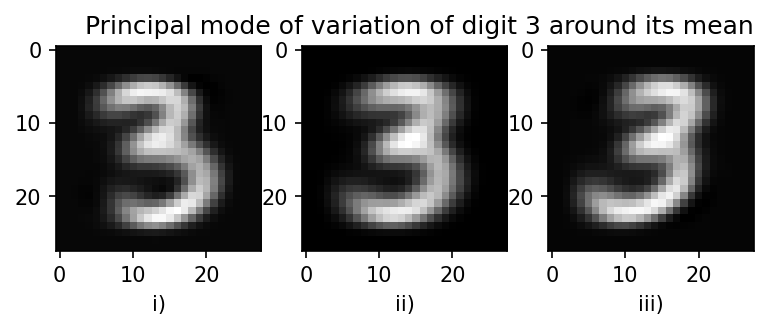

In [104]:
#For digit 3
v31 = v31.reshape(784,1)
pm3_1 = mu3 - sqrt(lambda31)*v31
pm3_2 = mu3
pm3_3 = mu3 + sqrt(lambda31)*v31

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm3_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm3_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm3_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 3 around its mean',loc='right')
plt.show()

For digit 3, the principal mode of variation tell us that people usually write the digit as: 
All the plots are almost similar in shape.In iii),the number is inclined towards the left whereas in i),there is no such inclination.

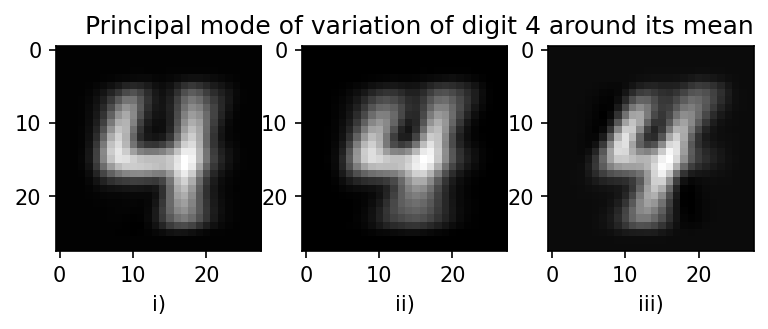

In [105]:
#For digit 4
v41 = v41.reshape(784,1)
pm4_1 = mu4 - sqrt(lambda41)*v41
pm4_2 = mu4
pm4_3 = mu4 + sqrt(lambda41)*v41

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm4_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm4_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm4_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 4 around its mean',loc='right')
plt.show()

For digit 4, the principal mode of variation tell us that people usually write the digit as: All the plots are almost similar in shape.In iii),the number is inclined towards the left and a bit narrower whereas in i),there is no such inclination.

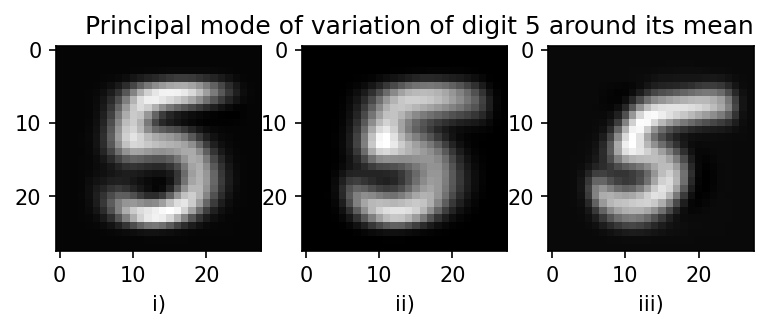

In [106]:
#For digit 5
v51 = v51.reshape(784,1)
pm5_1 = mu5 - sqrt(lambda51)*v51
pm5_2 = mu5
pm5_3 = mu5 + sqrt(lambda51)*v51

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm5_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm5_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm5_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 5 around its mean',loc='right')
plt.show()

For digit 5, the principal mode of variation tell us that people usually write the digit as: These plots show different ways of writing 5. While in i), the 5 is more curved and looks like an 'S',in iii)the 5 is inclined,the half-loop below is smaller.

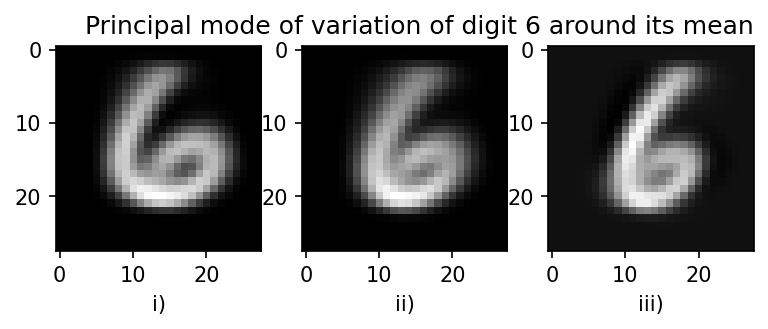

In [107]:
#For digit 6
v61 = v61.reshape(784,1)
pm6_1 = mu6 - sqrt(lambda61)*v61
pm6_2 = mu6
pm6_3 = mu6 + sqrt(lambda61)*v61

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm6_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm6_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm6_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 6 around its mean',loc='right')
plt.show()

For digit 6, the principal mode of variation tell us that people usually write the digit as: All the plots are almost similar in shape.In i),the 6 is curved and the loop is distinctly drawn while in iii)the 6 has a slanted edge and the bottom loop is also differently drawn as compared to i).

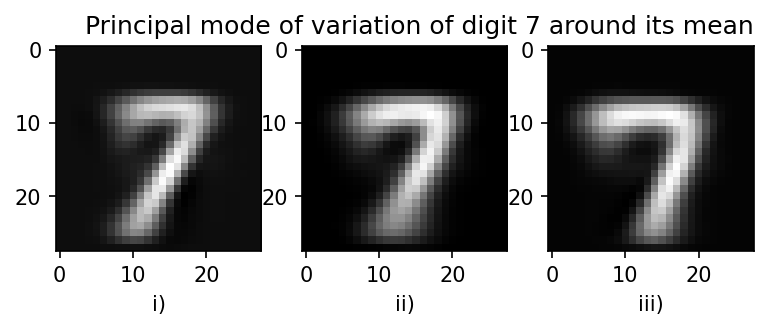

In [108]:
#For digit 7
v71 = v71.reshape(784,1)
pm7_1 = mu7 - sqrt(lambda71)*v71
pm7_2 = mu7
pm7_3 = mu7 + sqrt(lambda71)*v71

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm7_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm7_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm7_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 7 around its mean',loc='right')
plt.show()

For digit 7, the principal mode of variation tell us that people usually write the digit as: All the plots are almost similar in shape. While the 7 in i) has straighter edges, the 7 in iii) is more curved.

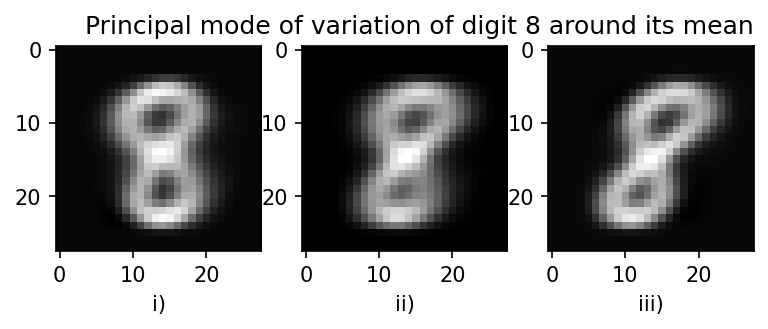

In [109]:
#For digit 8
v81 = v81.reshape(784,1)
pm8_1 = mu8 - sqrt(lambda81)*v81
pm8_2 = mu8
pm8_3 = mu8 + sqrt(lambda81)*v81

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm8_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm8_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm8_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 8 around its mean',loc='right')
plt.show()

For digit 8, the principal mode of variation tell us that people usually write the digit as: All the plots are almost similar in shape.In iii),the number is inclined towards the right whereas in i),there is no such inclination.

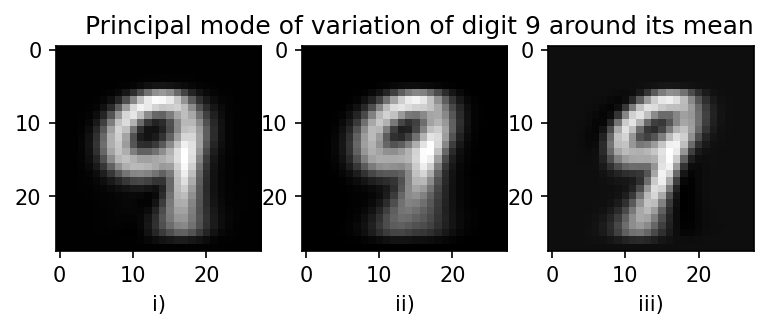

In [110]:
#For digit 9
v91 = v91.reshape(784,1)
pm9_1 = mu9 - sqrt(lambda91)*v91
pm9_2 = mu9
pm9_3 = mu9 + sqrt(lambda91)*v91

plt.figure(dpi=150)
plt.subplot(1, 3, 1)
plt.imshow(pm9_1.reshape(28,28))
plt.xlabel('i)')
plt.subplot(1, 3, 2)
plt.imshow(pm9_2.reshape(28,28))
plt.xlabel('ii)')
plt.subplot(1, 3, 3)
plt.imshow(pm9_3.reshape(28,28))
plt.xlabel('iii)')
plt.title('Principal mode of variation of digit 9 around its mean',loc='right')
plt.show()

For digit 9, the principal mode of variation tell us that people usually write the digit as: .In iii),the number is inclined towards the left and the loop is a bit narrower whereas in i),there is no such inclination and the loop is almost a proper circle.

These plots help us visualise the principal modes of variation of different digits about their mean. For a certain digit, the principal mode of variation give us an idea about how people usually write that digit.